In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
telcom_data = pd.read_csv('data/train.csv')
telcom_data.set_index('id', inplace=True)

# Exploratory Data Analysis

In [3]:
telcom_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telcom_data.shape

(69999, 171)

In [5]:
pd.set_option('display.max_rows', None)
telcom_data.dtypes

circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

### Data Cleaning

In [6]:
# clean the data for safe checks like empty columns and empty rows...
def sanity_clean_data(telcom_data):
    #columns with all empty values to be removed
    telcom_data.dropna(axis=1, how='all', inplace=True)
    
    #columns with all same values to be removed as they dont provide any insight
    cols_nounique = [i for i in telcom_data.columns if telcom_data[i].nunique()==1]
    telcom_data.drop(columns=cols_nounique, inplace=True, axis=1)
    print(cols_nounique)
    
    #rows with all NAs to be removed
    telcom_data.dropna(axis=0,how='all',inplace=True)
    
sanity_clean_data(telcom_data)    

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [7]:
telcom_data.shape

(69999, 158)

In [8]:
#since the data is only from year 2014, converting it to day of the year.
# to keep it extensible for any other years, multiplying it with days in year + day in year
def reform_dates(telcom_data):
    date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
    for col_name in date_cols:
        telcom_data[col_name] = pd.to_datetime(telcom_data[col_name]).dt.year*366 + pd.to_datetime(telcom_data[col_name]).dt.dayofyear
    return telcom_data
telcom_data = reform_dates(telcom_data)

In [9]:
telcom_data.columns[telcom_data.isna().any()]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=114)

In [10]:
telcom_data['fb_user_6'].unique()

array([nan,  1.,  0.])

In [11]:
telcom_data['churn_probability'] = telcom_data.churn_probability.apply(lambda x: int(x))


In [12]:
telcom_data.columns[telcom_data.isnull().mean() > 0.70]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

There are columns that are having more than 70% missing values.
but looking at these columns, it completely makes sense as they are not applicable. hence we need to impute them appropriately

Here, date of last recharge can be imputed with mode and other columns with zero as it is not applicable

In [13]:
#Lets look at the data dictionary and classify numeric vs categorical columns
cat_col_prefix = ['date_of_last_rech_','date_of_last_rech_data_']
cat_cols = []
for i in range(6,9):
    for prefix in cat_col_prefix:
        cat_cols.append(prefix+str(i))
cat_cols

['date_of_last_rech_6',
 'date_of_last_rech_data_6',
 'date_of_last_rech_7',
 'date_of_last_rech_data_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_8']

In [14]:
num_cols = [i for i in telcom_data.columns if i not in cat_cols]
num_cols.remove('churn_probability')

In [15]:
non_zero_cols = ['aon']

In [16]:
# change columns types
telcom_data[num_cols] = telcom_data[num_cols].apply(pd.to_numeric)
telcom_data[cat_cols] = telcom_data[cat_cols].apply(lambda column: column.astype("category"), axis=0)
telcom_data['churn_probability'] = telcom_data['churn_probability'].astype("category")

In [17]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


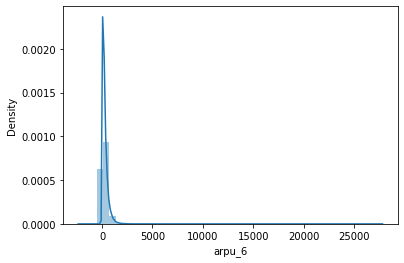

In [18]:
univariate(telcom_data.arpu_6)

count    66296.000000
mean       132.978257
std        311.896596
min          0.000000
25%          6.410000
50%         32.100000
75%        115.060000
max      10752.560000
Name: onnet_mou_8, dtype: float64


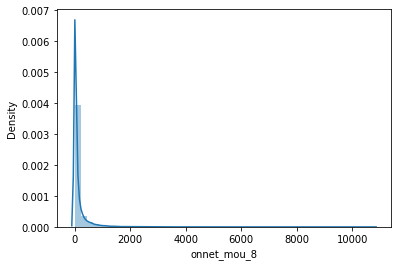

In [19]:
univariate(telcom_data.onnet_mou_8)

count    66296.000000
mean       196.543577
std        324.089234
min          0.000000
25%         31.575000
50%         91.800000
75%        229.345000
max      14007.340000
Name: offnet_mou_8, dtype: float64


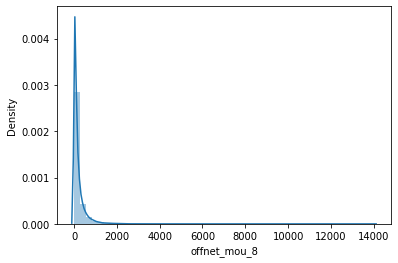

In [20]:
univariate(telcom_data.offnet_mou_8)

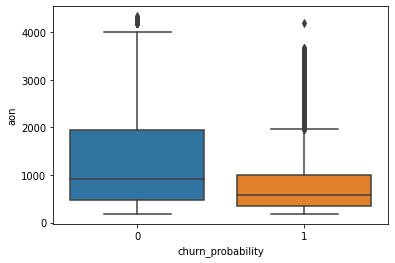

In [21]:
bivariate(telcom_data['churn_probability'], telcom_data['aon'])

In [33]:
# A graphPlotter function which plots the graphs based on the parameters passed
import math
def graphPlotter(graphType,telcom_data,x,y):
    plt.figure(figsize=[18, math.ceil(len(x)/2)*6])
    for i, col in enumerate(x, 1):
        try:
            plt.subplot(math.ceil(len(x)/2),2,i)
            title_text= f'{col} vs {y}'
            x_label= f'{col}'
            if graphType == 'scatterplot':
                fig= sns.scatterplot(data= telcom_data, x=col, y=y)
            elif graphType == 'distplot':
                fig = sns.distplot(telcom_data[col])
            else:
                fig= sns.boxplot(data= telcom_data, x=col, y=y)
            fig.set_title(title_text, fontdict= { 'fontsize': 15})
            fig.set_xlabel(x_label, fontdict= {'fontsize': 8})
        except:
            print(i,col)
    plt.show()

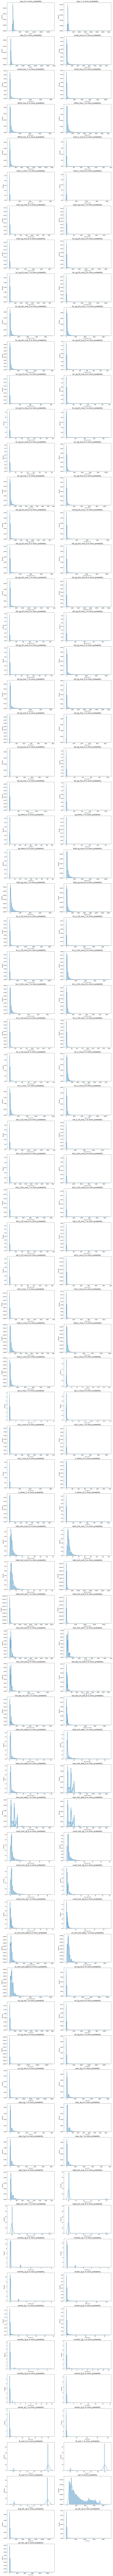

In [34]:
graphPlotter('distplot',telcom_data,num_cols,'churn_probability')

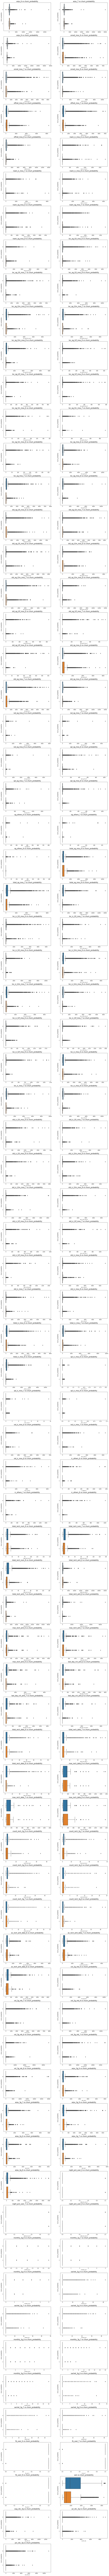

In [23]:
graphPlotter('boxplot',telcom_data,num_cols,'churn_probability')

### Imputation

In [35]:
#Missing values imputation:
# impute all numeric cols with median and categorical ones with mode
#for col in num_cols:
#    telcom_data[col].fillna(telcom_data[col].median(), inplace=True)
def impute_missing_values(data):
    #impute non applicable data with zeros
    data[non_zero_cols] = data.filter(non_zero_cols).fillna(data.median(numeric_only=True).iloc[0])
    data[num_cols] = data.filter(num_cols).fillna(0)
    data[cat_cols] = data.filter(cat_cols).fillna(data.mode().iloc[0])
    return data
telcom_data = impute_missing_values(telcom_data)

In [36]:
telcom_data.shape

(69999, 158)

In [58]:
from sklearn.model_selection import train_test_split

X = telcom_data.iloc[:,0:telcom_data.shape[1]-1]
y = telcom_data['churn_probability']
# since we have 70000 data points, putting 10k aside for test and 60k for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [59]:
from sklearn.preprocessing import StandardScaler
#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#Simple Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt_cf = DecisionTreeClassifier(max_depth=7,min_samples_leaf=10)

dt_cf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [81]:
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score,plot_roc_curve
def evaluate_model(model):
    y_train_pred = dt_cf.predict(X_train)
    print('Confusion Matrix: ',confusion_matrix(y_train, y_train_pred))
    print('Precision: ',precision_score(y_train, y_train_pred, average=None))
    print('Accuracy: ',accuracy_score(y_train, y_train_pred))
    plot_roc_curve(model, X_train, y_train, drop_intermediate=False)
    plt.show()

In [84]:
from sklearn.model_selection import GridSearchCV
classifier_rf = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
# params = {
#     'max_depth': [4, 6, 10,20,30],
#     'min_samples_leaf': [100, 500, 1000, 5000]
# }

params = {    
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],    
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=2, scoring = 'roc_auc')

In [85]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 250, 500, 800,
                                              1000]},
             scoring='accuracy', verbose=2)

In [86]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)

In [87]:
grid_search.best_score_

0.9407889430883285

Confusion Matrix:  [[52271  1137]
 [ 2117  3974]]
Precision:  [0.96107597 0.77753864]
Accuracy:  0.9453100052101716


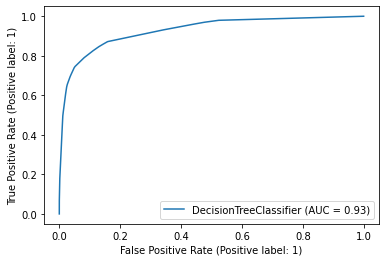

In [89]:
evaluate_model(dt_best)

In [95]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns,
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [100]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

InvocationException: GraphViz's executables not found

In [159]:
## Use Random forest classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4, 6, 10],
    'min_samples_leaf': [100, 500, 1000, 5000],
    'max_features': [5, 10],
    'n_estimators': [10, 50, 100, 1000],
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=2, scoring = 'roc_auc')

In [161]:
%%time
#grid_search.fit(X_train_pca,y)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [162]:
#rf_best = grid_search.best_estimator_
#rf_best

In [163]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y, rf_best.predict(X_train_pca))

In [164]:
#accuracy_score(y,rf_best.predict(X_train_pca))

In [165]:
from sklearn.metrics import precision_score
#precision_score(y, rf_best.predict(X_train_pca), average=None)

In [166]:
'''

test_data = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c40/test.csv', header=0);
#test_data.set_index('id', inplace=True)
test_data = reform_dates(test_data)
test_data['churn_probability'] = 0
test_data = impute_missing_values(test_data)
y_test = test_data.pop('churn_probability')
X_test = test_data[X.columns]
X_test_std = scaler.transform(X_test)

X_test_pca = pca.transform(X_test_std)
test_data['churn_probability'] = rf_best.predict(X_test_pca)
solution = test_data[['id', 'churn_probability']]
solution.set_index('id', inplace=True)
solution.to_csv('solution.csv', header=True, index=True)
'''

"\n\ntest_data = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c40/test.csv', header=0);\n#test_data.set_index('id', inplace=True)\ntest_data = reform_dates(test_data)\ntest_data['churn_probability'] = 0\ntest_data = impute_missing_values(test_data)\ny_test = test_data.pop('churn_probability')\nX_test = test_data[X.columns]\nX_test_std = scaler.transform(X_test)\n\nX_test_pca = pca.transform(X_test_std)\ntest_data['churn_probability'] = rf_best.predict(X_test_pca)\nsolution = test_data[['id', 'churn_probability']]\nsolution.set_index('id', inplace=True)\nsolution.to_csv('solution.csv', header=True, index=True)\n"

##Using Boosting

In [171]:

import xgboost as xgb  # Load this xgboost
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()
# Fit the model to our train and target
xgb_cfl.fit(X_train_pca, y)  # default 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, xgb_cfl.predict(X_train_pca))

array([[62502,   365],
       [ 1360,  5772]])

In [173]:
X_test_std = scaler.transform(X_test)

In [174]:
X_test_pca = pca.transform(X_test_std)
test_data['churn_probability'] = xgb_cfl.predict(X_test_pca)
solution = test_data[['id', 'churn_probability']]
solution.set_index('id', inplace=True)
solution.to_csv('solution.csv', header=True, index=True)